# OneClassSVM

In [308]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data_pretraitee/data_pretraite.csv", sep=';', index_col = 0)
data = data.sort_values( by = 'N2O')


In [313]:
col = ["N2O","acs","pn","bi","bio","elev","ref","2018","2019","2020","2021"]
target = "N2O"

In [ ]:
# ;N2O;Date;Bande;soilH_h1;soilH_h2;NO3_h1;NO3_h2;NH4_h1;NH4_h2;meanTP;air_humidity;pluie;CP;peuplement;fertilisation;nbJours_ferti;travail_sol;ajout_phyto;semis;recolte;mean_soilH_h1;mean_soilH_h2;mean_NO3_h1;mean_NO3_h2;mean_NH4_h1;mean_NH4_h2;N2O_J45;N2O_J60;Temp_moyenne_5J;Humidite_moyenne_5J;Temp_max_5J;Humidite_max_5J;Temp_min_5J;Humidite_min_5J;Sum_pluie_5J;Sum_ETP_5J;acs;pn;bi;bio;elev;ref;week;month;year;2018;2019;2020;2021


In [314]:
X = data[col].copy().reset_index(drop = True)
X.loc[X[target] <= 0.1, target] = 0.1
X[target] = np.log(X[target]) # Passage au log de N2O pour diminuer influence des pics importants
print(range(X.shape[1]))


range(0, 11)


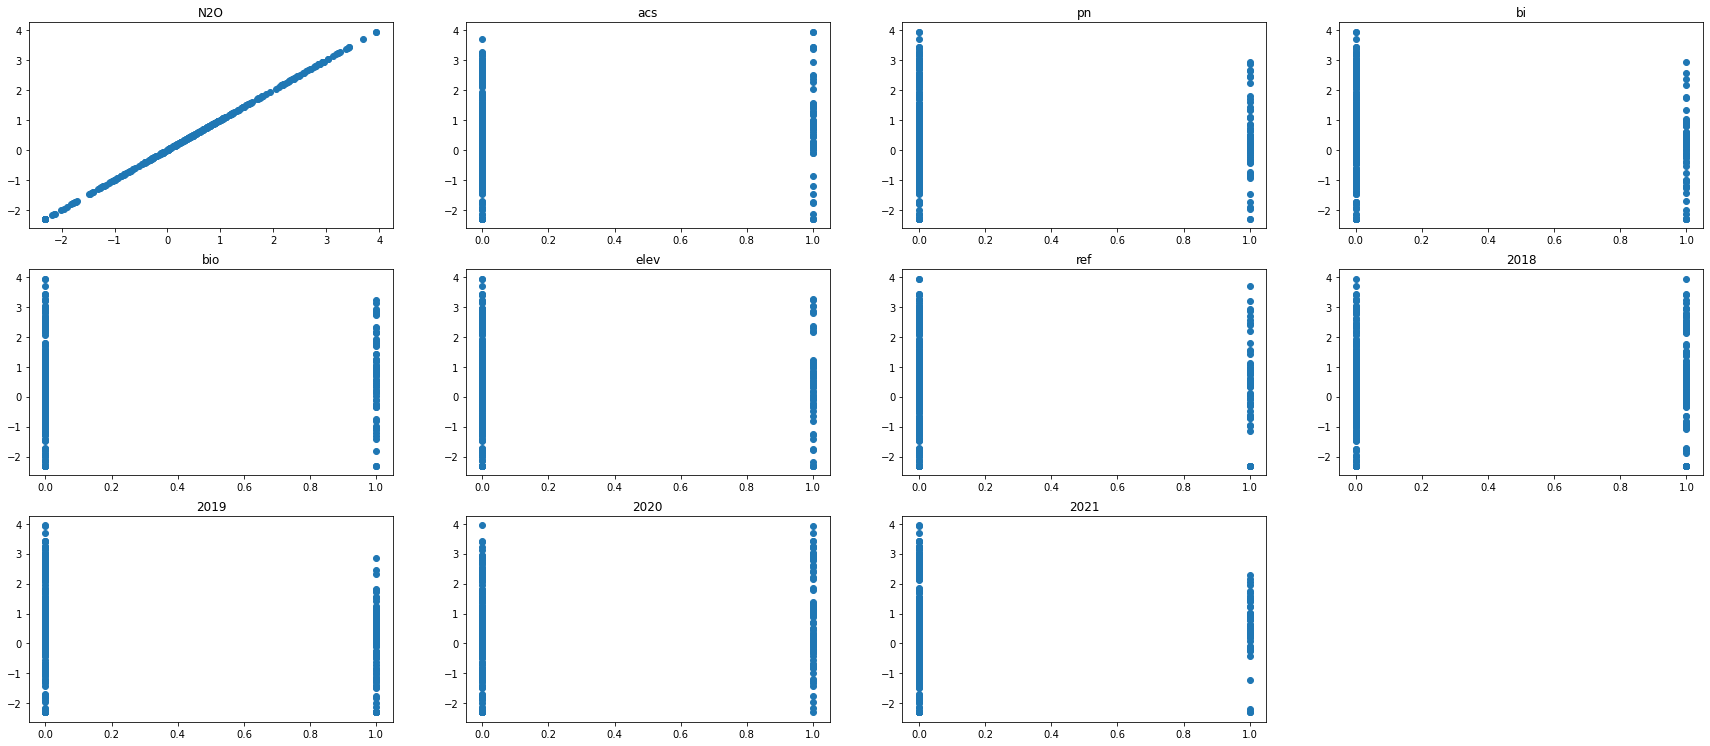

In [315]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30,10))

for i, name_c in enumerate(X.columns) :
    plt.subplot(6,4,i + 1)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(X[name_c], X[X.columns[:1]])
    plt.title(name_c)


In [305]:
from sklearn.svm import OneClassSVM

train = X.copy()

y = train[train.columns[:1]]

clf_y_b = OneClassSVM(gamma= 'auto', nu = 0.5, kernel= 'rbf')
clf_y_b.fit(X)
Z_y_b = clf_y_b.predict(X)
Z_y_b[:int(len(Z_y_b)/3)] = [1] * int(len(Z_y_b)/3) # Je passe toutes valeurs pics détecter à la mauvaise extréminité à 1
plt.scatter(range(len(y)), y, c = Z_y_b, label=['pas pics', 'pics'])
plt.ylabel("log(N2O) emission gN.ha-1.j-1")
plt.title("log(N2O) emission sorted by value", fontsize = 20)
plt.legend(['pas pics', 'pics'],loc="upper left", title="Classes")



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

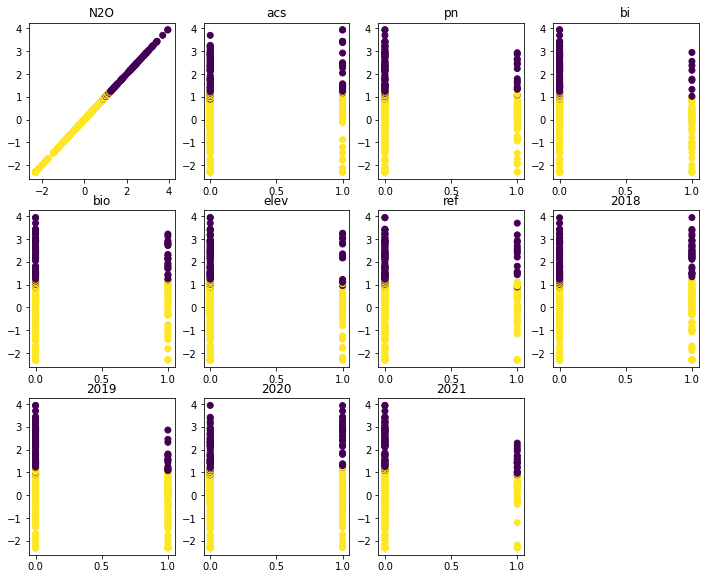

In [283]:
plt.figure(figsize=(12,5))
for i, name_c in enumerate(X) :
    plt.subplot(4,4,i + 1)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(X[name_c],y, c= Z_y_b)
    plt.title(name_c)

In [284]:
data['Pic SVM'] = Z_y_b

In [285]:
data.head()

,N2O,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,meanTP,...,elev,ref,week,month,year,2018,2019,2020,2021,Pic SVM
60,-1.393499,2018-06-28,acs,0.115083,0.123920,9.704488,9.603074,0.619208,1.086268,21.4,...,0.0,0.0,26,6,2018,1.0,0.0,0.0,0.0,1
70,-0.436746,2018-07-11,elev,0.070751,0.099841,3.593315,5.343852,0.469527,0.300458,17.5,...,0.0,0.0,28,7,2018,1.0,0.0,0.0,0.0,1
320,-0.390366,2021-02-08,ref,0.222509,0.218402,6.047582,7.285328,1.889869,1.419856,-1.4,...,0.0,1.0,6,2,2021,0.0,0.0,0.0,1.0,1
71,-0.323810,2018-07-11,ref,0.079820,0.101607,3.877878,6.230485,0.417917,0.236737,17.5,...,0.0,1.0,28,7,2018,1.0,0.0,0.0,0.0,1
220,-0.249388,2019-11-05,pn,0.208135,0.202400,1.366935,0.914537,3.321413,3.785169,8.9,...,1.0,0.0,45,11,2019,0.0,1.0,0.0,0.0,1


In [286]:
data.to_csv("../data_pretraitee/data_svm_result.csv", sep=";")

In [287]:
test = pd.DataFrame(list(zip(data.Bande, data['Pic SVM'])), 
               columns =['Bande', 'Pic SVM']) 

test = test[test['Pic SVM'] == -1]
test = test.groupby('Bande').sum().abs()['Pic SVM']
test

Bande
acs     23
bi      14
bio      8
elev    21
pn      15
ref     14
Name: Pic SVM, dtype: int64

In [288]:
# plt.bar(test.Bande, test.Pic, color='orange') 